In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload both base image and template image
uploaded = files.upload()

Saving WhatsApp Image 2025-06-27 at 14.57.22_c2eb18d2.jpg to WhatsApp Image 2025-06-27 at 14.57.22_c2eb18d2 (1).jpg
Saving WhatsApp Image 2025-06-27 at 14.57.39_4aa28bf9.jpg to WhatsApp Image 2025-06-27 at 14.57.39_4aa28bf9 (1).jpg


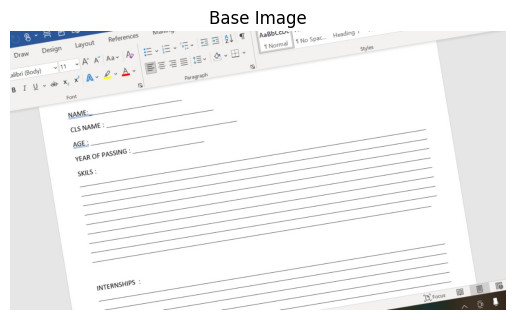

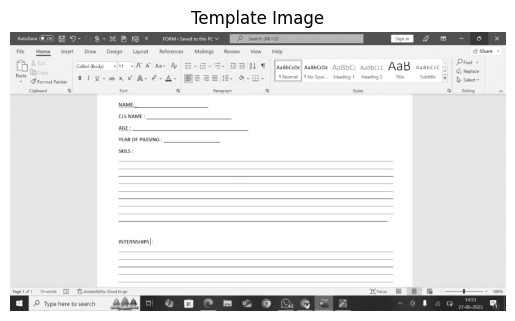

In [ ]:
# Extract file names
file_names = list(uploaded.keys())
img_path = file_names[0]  # Base image
template_path = file_names[1]  # Template image

# Read the images
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread(template_path, 0)
w, h = template.shape[::-1]

plt.imshow(img_rgb)
plt.title("Base Image")
plt.axis("off")
plt.show()

plt.imshow(template, cmap='gray')
plt.title("Template Image")
plt.axis("off")
plt.show()

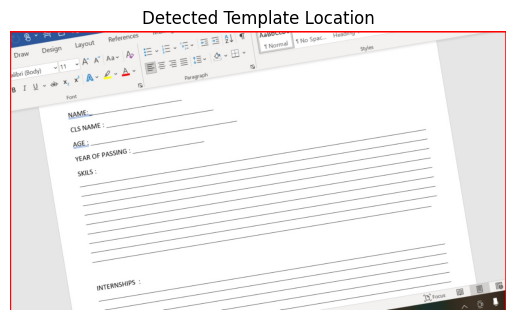

In [ ]:
# Convert base image to grayscale for matching
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply template Matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Get coordinates of best match
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw rectangle on match location
cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 3)

plt.imshow(img_rgb)
plt.title("Detected Template Location")
plt.axis("off")
plt.show()

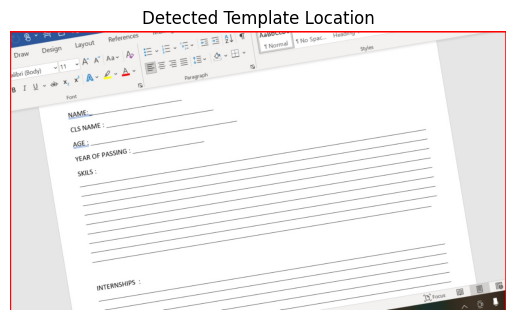

In [ ]:
# Convert base image to grayscale for matching
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply template Matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Get coordinates of best match
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw rectangle on match location
cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 3)

plt.imshow(img_rgb)
plt.title("Detected Template Location")
plt.axis("off")
plt.show()

In [ ]:
# Upload second image for alignment (if needed)
print("Upload second image for alignment:")
uploaded2 = files.upload()

# Extract file name
alignment_img_path = list(uploaded2.keys())[0]
img_align = cv2.imread(alignment_img_path)
img_align_gray = cv2.cvtColor(img_align, cv2.COLOR_BGR2GRAY)
img_gray_base = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Upload second image for alignment:


Saving WhatsApp Image 2025-06-27 at 14.57.39_4aa28bf9.jpg to WhatsApp Image 2025-06-27 at 14.57.39_4aa28bf9 (2).jpg


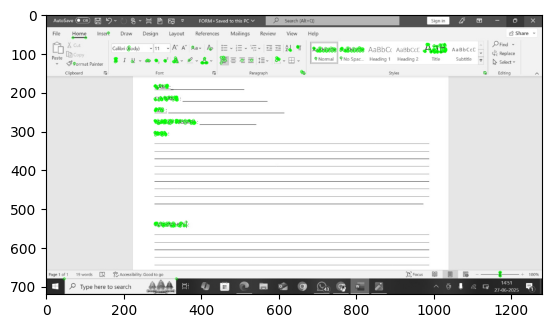

(<matplotlib.image.AxesImage at 0x7e794442d290>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('WhatsApp Image 2025-06-27 at 14.57.39_4aa28bf9.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

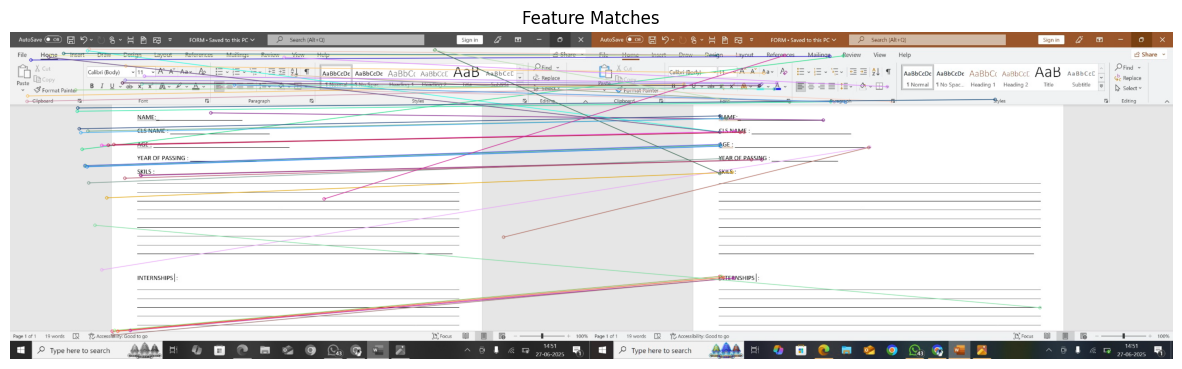

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create(5000)


# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img_gray_base, None)
kp2, des2 = orb.detectAndCompute(img_align_gray, None)

# Use Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 matches
img_matches = cv2.drawMatches(img, kp1, img_align, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(15, 10))
plt.imshow(img_matches)
plt.title("Feature Matches")
plt.axis("off")
plt.show()

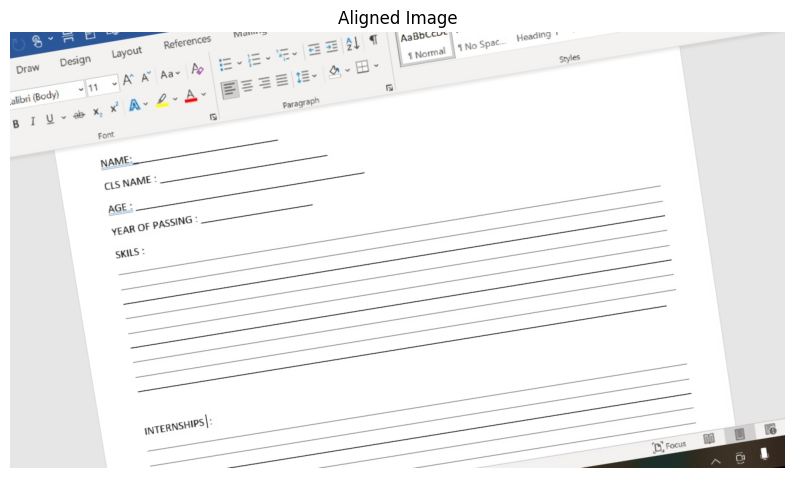

In [ ]:
# Extract location of good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:50]]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:50]]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

# Use homography to warp image
height, width, channels = img_align.shape
aligned_img = cv2.warpPerspective(img_align, M, (width, height))

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.title("Aligned Image")
plt.axis("off")
plt.show()